In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg-dataset/auto-mpg.csv


In [2]:
auto=pd.read_csv("../input/autompg-dataset/auto-mpg.csv")

In [3]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


****amacımız mpg tahmin etmek head() ile ilk 5 gözleme bakıyoruz ****

In [4]:
auto.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

****origin arabaların geldikleri ülkeleri 1 2 3 diye kodlamışlar value_counts metodu değerin kaç tane olduğunu söyler örneğin  kaç tane 1 olduğuna kaç tane 2 olduğuna bakalım ****

****1 ülkesinde  249 tane var 2 ülkesinde 79 tane var 3 ülkesinde 70 tane var ****

car name kolonuna value_counts uygulayalım


In [5]:
auto["car name"].value_counts()

ford pinto                  6
ford maverick               5
toyota corolla              5
amc matador                 5
chevrolet impala            4
                           ..
volkswagen rabbit custom    1
honda accord lx             1
bmw 2002                    1
ford f108                   1
chevy c10                   1
Name: car name, Length: 305, dtype: int64

In [6]:
auto.shape

(398, 9)

veri setinin şekline bakalım 389 tane satır örnek var 9 tane kolon var

In [7]:
auto.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

veri setindeki kolonların veri tiplerine bakıyoruz dtypes ile float veya int'e benzetemediği şeyi object'e atıyor object burada stringi karşılar

In [8]:
auto.cylinders.astype("category")

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: category
Categories (5, int64): [3, 4, 5, 6, 8]

silindir sayılarının tipi int idi biz kategoriğe çevirdik bu şekilde sınıflandırma yapabileceğiz3 silindirliler bir sınıfta 4 silindirliler bir sınıfta şeklinde 

In [9]:
auto= auto.rename(columns = {"model year":"model_year","car name":"car_name"})
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [10]:
auto.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

eksik değer hiç var mı diye soruyoruz isnull null var mı any hiç kayıp gözlemi öğreniyoruz 


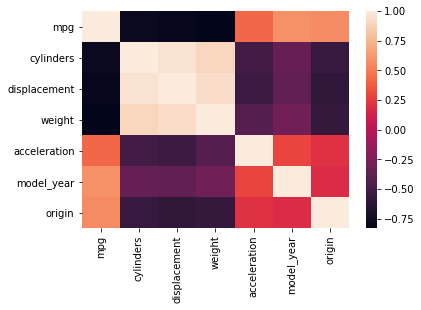

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_palette("RdBu")
correlation=auto.corr()
sns.heatmap(correlation)
plt.show()

korelasyonu görselleştirdik 
sağ tarafta bir ölçek var en üstteki 1 en yüksek korelasyon demek siyahlar ise korelasyonu en düşük olanlardır
kesişimlerine bakıyoruz örneğin hız ile ağırlık ilişkisi

In [12]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


veri seti hakkında daha detaylı  bilgi veriyor 

****Kategorik değişkenleri encoding uygulayacağız yani yani 1 000 01000 00100 gibi geçtiği satırı belirli bir sayıya çevireceğiz ****

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car_name_le = pd.DataFrame(le.fit_transform(auto[["car_name"]]),columns=["car_name_encoded"])
car_name_le


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,car_name_encoded
0,49
1,36
2,231
3,14
4,161
...,...
393,153
394,301
395,119
396,159


algoritmaya veriyi sokarken bazı önişlemelerden geçirmemiz gerekiyor
nümerik verileri ölçeklendirmeliyiz 0 -1 arasına 
kategorik bir verimiz varsa bunu da encoding etmemiz gerekir 
label encoder şunu yapıyor 1 gördüğüne 1 2 gördüğüne 2 aynı gördüğüne tekrar 1 şeklinde bir sayı vererek gidiyor bu şekilde kategorik verinin bir anlamı oluyor bunları kategorize ediyor aslında 
LabelEncoder Sklearn'nin Preprocessing kütüphanesine ait bir class o yüzden oradan import ettik 
ardından le adında LabelEncoder nesnesi oluşturduk 
fit metodu bu nesneyi bizim veri setimize uyduruyor 
fit dediğimiz zaman hangisine 1 2 diyeceğini belirliyor kendisi obje kural belirliyor transfor da veri setine belirlenmiş kuralı uyguluyor 
peki bunları yapmasak veri kategorik olarak kalsa lineer regresyon gibi makine öğrenmesi modellerine kategorik veri veremezsiniz herşey nümerik olmalı 
fit etme işlemini bir kere yapabiliyoruz 


In [14]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(handle_unknown="ignore")
car_name_ohe = ohe.fit_transform(auto)
car_name_ohe_df = pd.DataFrame(data=car_name_ohe.toarray())
print(car_name_ohe_df)

     0     1     2     3     4     5     6     7     8     9     ...  1067  \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  ...   0.0   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
393   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
394   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
395   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
396   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
397   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     1068  1069  1070  1071  1072  1073  1074  1075  1076  
0  

2.encoding yöntemi ohe hot encoding yöntemi hepsi eşit ilişki de ise kullanılır her satırda o kategoride değer gelirse ona 1 veriyor 1000 0100 0010 0001 gibi geçtiği satırı 1 diğerlerini sıfır yapıyor 


In [15]:
car_name_df = pd.concat([auto,pd.get_dummies(auto["car_name"] , prefix="model")],axis=1)
car_name_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,model_amc ambassador brougham,...,model_volvo 145e (sw),model_volvo 244dl,model_volvo 245,model_volvo 264gl,model_volvo diesel,model_vw dasher (diesel),model_vw pickup,model_vw rabbit,model_vw rabbit c (diesel),model_vw rabbit custom
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,0,...,0,0,0,0,0,0,0,0,0,0


veriyi yine 1 0 haline onehot encoding haline getiriyor yeni kolonlar oluşturuyor 0 1 lerden oluşan başına model_ koyuyor sonra modelin ismi oluyor 
burada ana auto verisi ile birleştirmiştir

In [16]:
auto= auto.drop(columns={"car_name"})

car_nameye ihtiyaç kalmadı silebiliriz

In [17]:
auto.shape

(398, 8)

****MİNMAX SCALER****

In [18]:
auto.horsepower=auto.horsepower.replace("?","165")
auto.horsepower = auto.horsepower.astype("int")

In [19]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(auto)

MinMaxScaler()

kolonları kendi içerisinde büyükten küçüğe 0 ile 1 arasında deeğrler vererek ölçeklendiriyor

In [20]:
auto_scaled = pd.DataFrame(scaler.fit_transform(auto),columns=auto.columns)
print(auto_scaled)

          mpg  cylinders  displacement  horsepower    weight  acceleration  \
0    0.239362        1.0      0.617571    0.456522  0.536150      0.238095   
1    0.159574        1.0      0.728682    0.646739  0.589736      0.208333   
2    0.239362        1.0      0.645995    0.565217  0.516870      0.178571   
3    0.186170        1.0      0.609819    0.565217  0.516019      0.238095   
4    0.212766        1.0      0.604651    0.510870  0.520556      0.148810   
..        ...        ...           ...         ...       ...           ...   
393  0.478723        0.2      0.186047    0.217391  0.333711      0.452381   
394  0.930851        0.2      0.074935    0.032609  0.146583      0.988095   
395  0.611702        0.2      0.173127    0.206522  0.193365      0.214286   
396  0.505319        0.2      0.134367    0.179348  0.286929      0.630952   
397  0.585106        0.2      0.131783    0.195652  0.313864      0.678571   

     model_year  origin  
0           0.0     0.0  
1          

bu şekilde dönüşüyor

StandartScaler da -1  ile 1 arasında değerler veriyor  standar normal dağılıma sahip bir yapıya dönüştürüyor 

In [21]:
X= auto_scaled.loc[:,auto.columns!="mpg"]
y=auto_scaled.mpg

bağımlı tahmin edeceğim y ile bağımsız değişkenleri x'i ayırıyoruz

In [22]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)

veri setini 80 20 şeklinde bölüyoruz 80 lik kısım eğitim kısmı 20 lik kısmı en son test kısmı ne kadar doğru bilmişim bunu ölçmek için kullanıyoruz 

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()